In [1]:
import pandas as pd                                         # loading and cleaning the dataset
import numpy as np                                          # manipulating it

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

import tensorflow as tf
from tensorflow import keras

####################################### Preparing data

path="C:/Users/vanes/OneDrive - Universitat de Barcelona/8e semestre/ML-EELS/"

ds = path + '/Mn_Fe_dataset.pkl'
lb = path + '/Mn_Fe_labels.pkl'

X = pd.read_pickle(ds)
y = pd.read_pickle(lb)

#X = X.to_numpy()
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

####################################### Defining the model

model = keras.Sequential([                                
    keras.layers.Dense(1200, activation='relu', input_shape=(X_train.shape[1],)),          
    keras.layers.Dropout(0.7),
    keras.layers.Dense((600/2), activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense((600/3), activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(5, activation='softmax')
])

# the last layer need to be 2, affiliation yes (1) or not (0), but with softmax we get their probabilities

model.compile(optimizer=tf.keras.optimizers.Adam(), # optimizer='adam'
              loss='sparse_categorical_crossentropy',   
              metrics=['accuracy'])

######################################## Training and evaluating the mdeo

model.fit(X_train, y_train, validation_split=0.2, batch_size=256, epochs=200) 
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
# print('\nTest accuracy:', test_acc) 

######################################## Making predictions

pred_prob = model.predict(X_test)
predictions = []

for i in range (0,len(pred_prob)):
    predictions.append(np.argmax(pred_prob[i]))

######################################## Accuracy

print('Accuracy', accuracy_score(y_test, predictions))

Epoch 1/200
20/20 [==============================] - 5s 121ms/step - loss: 1.1990 - accuracy: 0.5053 - val_loss: 0.7721 - val_accuracy: 0.6243
Epoch 2/200
20/20 [==============================] - 1s 62ms/step - loss: 0.8616 - accuracy: 0.6024 - val_loss: 0.6980 - val_accuracy: 0.6973
Epoch 3/200
20/20 [==============================] - 2s 110ms/step - loss: 0.7480 - accuracy: 0.6523 - val_loss: 0.5876 - val_accuracy: 0.7820
Epoch 4/200
20/20 [==============================] - 2s 79ms/step - loss: 0.6189 - accuracy: 0.7194 - val_loss: 0.4524 - val_accuracy: 0.8792
Epoch 5/200
20/20 [==============================] - 2s 114ms/step - loss: 0.4737 - accuracy: 0.8047 - val_loss: 0.3074 - val_accuracy: 0.9075
Epoch 6/200
20/20 [==============================] - 2s 83ms/step - loss: 0.3868 - accuracy: 0.8558 - val_loss: 0.2788 - val_accuracy: 0.8996
Epoch 7/200
20/20 [==============================] - 3s 127ms/step - loss: 0.3247 - accuracy: 0.8762 - val_loss: 0.1691 - val_accuracy: 0.9412
Ep

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1660
           1       0.94      0.96      0.95       671
           2       0.99      1.00      1.00       347
           3       0.96      0.98      0.97       305
           4       0.99      0.97      0.98       448

    accuracy                           0.98      3431
   macro avg       0.97      0.98      0.98      3431
weighted avg       0.98      0.98      0.98      3431



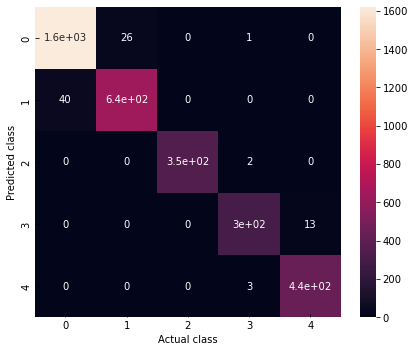

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions))


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
%matplotlib inline

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

cm = confusion_matrix(predictions, y_test)

fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.heatmap(cm, annot = True)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.ylabel('Predicted class')
plt.xlabel('Actual class')
plt.tight_layout()